In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [3]:
df = pd.read_csv(r"C:\Users\swapn\OneDrive\Desktop\Dataset_Creation\employee_data.csv")
df.head()

,YearsExperience,EducationLevel,JobTitle,Department,Salary
0,10.2,Bachelor's,Director,Marketing,206898
1,1.4,Bachelor's,Intern,Sales,71887
2,14.3,PhD,Specialist,Marketing,150550
3,18.8,Master's,Manager,Finance,160273
4,13.4,Master's,Specialist,Sales,124316


In [4]:
df.shape

(196, 5)

In [5]:
df['Department'].unique()

array(['Marketing', 'Sales', 'Finance', 'Engineering', 'HR'], dtype=object)

In [6]:
df['JobTitle'].unique()

array(['Director', 'Intern', 'Specialist', 'Manager', 'Analyst'],
      dtype=object)

In [7]:
df['EducationLevel'].unique()

array(["Bachelor's", 'PhD', "Master's", nan], dtype=object)

In [8]:
df.isnull().sum()

YearsExperience    47
EducationLevel     16
JobTitle            0
Department          0
Salary              0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196 entries, 0 to 195
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  149 non-null    float64
 1   EducationLevel   180 non-null    object 
 2   JobTitle         196 non-null    object 
 3   Department       196 non-null    object 
 4   Salary           196 non-null    int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 7.8+ KB


In [10]:
# df = df.dropna()
# df.isnull().sum()

In [11]:
df['YearsExperience'] = df['YearsExperience'].fillna(df['YearsExperience'].median())
df['EducationLevel'] = df['EducationLevel'].fillna(df['EducationLevel'].mode())

In [12]:
for col in ['EducationLevel', 'JobTitle', 'Department']:
    df[col] = df[col].fillna('Unknown')

In [13]:
df_encoded = pd.get_dummies(df, columns=['EducationLevel', 'JobTitle', 'Department'], drop_first=True)

### Multiple Linear Regression

In [14]:
X = df_encoded.drop('Salary', axis=1)
y = df_encoded['Salary']

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [17]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

In [18]:
y_pred = model.predict(X_test_scaled)

In [19]:
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

In [20]:
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)

Intercept: 143707.86538461538
Coefficients: [21955.66518718  7948.55747921 20205.66680141  2899.88257101
 32579.81812082  -646.81806096 19496.57166339  8713.52820623
 -2358.19725683 -5385.09042864 -4293.21957191 -4848.02270395]


In [21]:
print("\nModel Performance:")
print(f"R² Score: {r2*100:.2f}%")
print(f"RMSE: ${rmse:,.2f}")


Model Performance:
R² Score: 92.79%
RMSE: $15,932.79


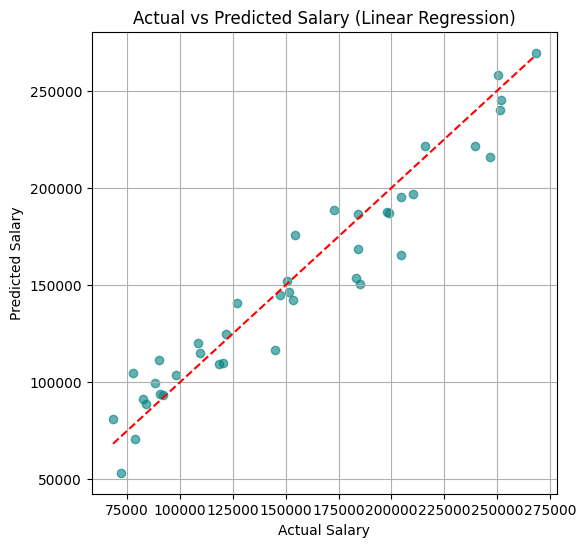

In [22]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, color='teal', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel("Actual Salary")
plt.ylabel("Predicted Salary")
plt.title("Actual vs Predicted Salary (Linear Regression)")
plt.grid(True)
plt.show()

In [23]:
new_data = pd.DataFrame({
    'YearsExperience': [15, 2, 20],
    'EducationLevel': ["Phd", "Master's", "Bachelor's"],
    'JobTitle': ['Analyst', 'Director', 'Manager'],
    'Department': ['Engineering', 'Finance', 'Sales']
})

In [24]:
new_data_encoded = pd.get_dummies(new_data)

In [25]:
new_data_encoded = new_data_encoded.reindex(columns=X_train.columns, fill_value=0)

In [26]:
predicted_salaries = model.predict(new_data_encoded)

c:\Users\swapn\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [27]:
new_data['Predicted Salary'] = predicted_salaries.round(2)
print("\n Predicted Salaries for New Employees:")
print(new_data)


 Predicted Salaries for New Employees:
   YearsExperience EducationLevel  JobTitle   Department  Predicted Salary
0               15            Phd   Analyst  Engineering         473042.84
1                2       Master's  Director      Finance         225789.37
2               20     Bachelor's   Manager        Sales         597469.72


In [31]:
import joblib

joblib.dump(model, "salary_predictor.pkl")

['salary_predictor.pkl']

In [32]:
joblib.dump(X.columns, "model_columns.pkl")

['model_columns.pkl']